# Food Item Nutrition Inference
Model Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, random_split, DataLoader
from torchvision.models import resnet50
from torchvision.models import resnet101
import torchvision.transforms as transforms

# Image processing
from PIL import Image

# Data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File and system operations
import os
import json
import ast

# 1 Data Loading and Formatting

In [ ]:
!git clone https://github.com/CHILLHITS/capstone-data.git
%cd capstone-data
!ls

Cloning into 'capstone-data'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 1117 (delta 28), reused 183 (delta 1), pack-reused 891
Receiving objects: 100% (1117/1117), 216.26 MiB | 20.12 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (1004/1004), done.
/content/capstone-data
'Data_final(1).xlsx'   Final_data+nutrition.csv   LICENSE
 data_subset1.csv     'image folder'		 'mapping data.xlsx'


In [ ]:
%cd capstone-data

# Load the xls file into a DataFrame
df = pd.read_excel('Data_final(1).xlsx')
nutrition_df = pd.read_excel('mapping data.xlsx')

def convert_string_to_float_list(s):
    try:
        return [float(item) for item in ast.literal_eval(s)]
    except (ValueError, SyntaxError):
        return s

df['value_150'] = df['value_150'].apply(convert_string_to_float_list)
df['Value_100'] = df['Value_100'].apply(convert_string_to_float_list)
df['value_50'] = df['value_50'].apply(convert_string_to_float_list)
df['Value_30'] = df['Value_30'].apply(convert_string_to_float_list)
df['value_cus_36'] = df['value_cus_36'].apply(convert_string_to_float_list)
# Display the first few rows of the DataFrame
df.head()

[Errno 2] No such file or directory: 'capstone-data'
/content/capstone-data


,dish name,value_150,Value_100,value_50,Value_30,value_cus_36
0,Air Fryer Hearts of Palm Sticks,"[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10..."
1,Air Fryer Cheesy Bacon Ranch French Fries,"[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2..."
2,Air Fryer Mini Dark Chocolate Cake with Brown ...,"[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ..."
3,Air Fryer Spanakopita,"[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75...."
4,Air Fryer Pecan Crusted Trout,"[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,..."


In [ ]:
%cd image folder
!ls *.json

/content/capstone-data/image folder
'Absolutely Wonderful Cheesy, Creamy Spinach Artichoke Dip.json'
'Air Fryer Apple Pies.json'
'Air Fryer Arancini.json'
'Air Fryer Bacon Wrapped Brussels Sprouts.json'
'Air Fryer BBQ Chicken Drummies.json'
'Air Fryer Blooming Onion.json'
'Air Fryer Caramelized Bananas.json'
'Air Fryer Cheese Curds.json'
'Air Fryer Cheesy Bacon Ranch French Fries.json'
'Air Fryer Cherry Cream Cheese Croissants.json'
'Air Fryer Chicken Bites with Parmesan Cheese.json'
'Air Fryer Chicken Tenders.json'
'Air Fryer Chicken Thighs.json'
'Air Fryer Chickpeas.json'
'Air Fryer Crispy Cajun Black-Eyed Peas.json'
'Air Fryer Crispy Pickle Chips with Creole Dipping Sauce.json'
'Air Fryer Everything Bagel Bites.json'
'Air Fryer Everything-Bagel Salmon Dinner.json'
'Air Fryer Frozen Chicken Strips.json'
'Air Fryer Garlic Green Beans.json'
'Air Fryer Green Bean Fries.json'
'Air Fryer Green Beans.json'
'Air Fryer Grilled Ham and Cheese.json'
'Air Fryer Grilled Peaches with Cinnamon.jso

In [ ]:
json_data = {}

# Loop through each JSON file in the directory
for json_file in os.listdir():
    if json_file.endswith('.json'):
        with open(json_file, 'r') as file:
            # Load the content of the JSON file
            data = json.load(file)

            # Check if the loaded data is a list or a dictionary
            if isinstance(data, list):
                # If it's a list, convert it to a dictionary with integer keys
                data = {i: item for i, item in enumerate(data)}

            # Store the content in the dictionary using the filename as the key
            json_data[json_file] = data

modified_json_data = {key.replace('.json', ''): value for key, value in json_data.items()}

In [ ]:
# Create a new column in the DataFrame to store the dictionary values
# Assuming the column with the matching values is named 'ColumnName' (replace with your actual column name)
df['data_value'] = df['dish name'].map(modified_json_data)
df.dropna(subset=['data_value'], inplace=True)
# Convert the dictionary to a numpy array of shape (60025, 3)
df['data_value'] = df['data_value'].apply(lambda x: np.vstack(list(x.values())) if isinstance(x, dict) else x)
# Check the shape of the first entry
df['data_value'][0].shape

(60025, 3)

## 1.1 Checking images

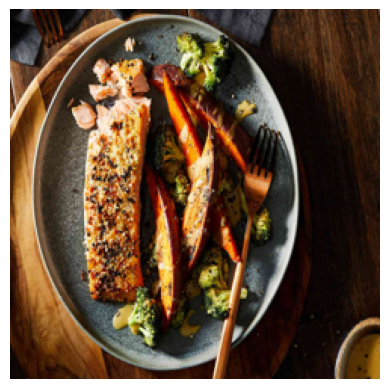

In [ ]:
image_data = df['data_value'][11].reshape(245, 245, 3)
plt.imshow(image_data.astype('uint8'))
plt.axis('off')  # To turn off axis numbers and ticks
plt.show()

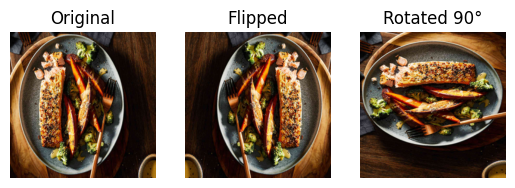

In [ ]:
def augment_and_show_image_subplot(image_data):
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image_data.astype('uint8'))
    plt.axis('off')
    plt.title('Original')

    # Perform a horizontal flip
    flipped_image = np.fliplr(image_data)
    plt.subplot(1, 3, 2)
    plt.imshow(flipped_image.astype('uint8'))
    plt.axis('off')
    plt.title('Flipped')

    # Rotate the image by 90 degrees
    rotated_image = np.rot90(flipped_image)
    plt.subplot(1, 3, 3)
    plt.imshow(rotated_image.astype('uint8'))
    plt.axis('off')
    plt.title('Rotated 90°')

    # Display the images using matplotlib
    plt.show()

# Call the function to augment and display the images in one row
augment_and_show_image_subplot(image_data)

In [ ]:
df.head()

,dish name,value_150,Value_100,value_50,Value_30,value_cus_36,data_value
0,Air Fryer Hearts of Palm Sticks,"[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[1.5, 0.0, 0.0, 1.0, 0.0, 0.0, 0.24, 31.25, 10...","[[129, 157, 196], [133, 162, 201], [137, 161, ..."
1,Air Fryer Cheesy Bacon Ranch French Fries,"[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[0.1, 0.0, 0.0, 56.0, 0.0, 0.0, 0.0, 0.0, 28.2...","[[229, 137, 25], [232, 138, 27], [235, 147, 34..."
2,Air Fryer Mini Dark Chocolate Cake with Brown ...,"[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[1.5, 150.0, 0.0, 1.0, 42.0, 0.0, 0.0, 31.25, ...","[[128, 101, 90], [138, 111, 100], [154, 127, 1..."
3,Air Fryer Spanakopita,"[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[0.0, 0.0, 0.0, 0.0, 113.5, 3.0, 0.0, 0.0, 75....","[[73, 56, 36], [66, 50, 29], [74, 57, 42], [64..."
4,Air Fryer Pecan Crusted Trout,"[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0,...","[[244, 244, 244], [246, 246, 246], [247, 247, ..."


In [ ]:
len(df)

912

# 2 Model Construction

## 2.1 Model Preprocessing

In [ ]:
def prepare_data(dataframe):
    images = []
    labels = {}

    # Define transformations and augmentations
    resize = transforms.Resize((245, 245))
    to_tensor = transforms.ToTensor()
    norm_transform = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    flip = transforms.RandomHorizontalFlip()
    rotation = transforms.RandomRotation(180)

    # Initialize labels dictionary
    for label_column in ['value_150', 'Value_100', 'value_50', 'Value_30', 'value_cus_36']:
        labels[label_column] = []

    for idx, row in dataframe.iterrows():
        # Convert image to RGB
        image = Image.fromarray(row['data_value'].astype('uint8')).convert("RGB")

        # Original Image
        transformed_image = resize(image)
        transformed_image = to_tensor(transformed_image)
        transformed_image = norm_transform(transformed_image)
        images.append(transformed_image)

        # Augmented Image
        augmented_image = flip(rotation(image))
        augmented_image = resize(augmented_image)
        augmented_image = to_tensor(augmented_image)
        augmented_image = norm_transform(augmented_image)
        images.append(augmented_image)

        # Add labels for both original and augmented image
        for label_column in ['value_150', 'Value_100', 'value_50', 'Value_30', 'value_cus_36']:
            label = torch.tensor(row[label_column]).float()
            labels[label_column].extend([label, label])

    return images, labels

Loading DATA into differenct groups

In [ ]:
# Use the function
sampled_images, all_labels = prepare_data(df)

# Convert images to tensor for training
images_tensor = torch.stack(sampled_images)

# DataLoaders
loaders = {}
for label_name, label_values in all_labels.items():
    labels_tensor = torch.stack(label_values)
    train_data = torch.utils.data.TensorDataset(images_tensor, labels_tensor)
    loaders[label_name] = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)

Check The Size

In [ ]:
for key, loader in loaders.items():
    print(f"Inspecting DataLoader for label: {key}")
    first_batch = next(iter(loader))
    images, labels = first_batch

    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

Inspecting DataLoader for label: value_150
Images shape: torch.Size([64, 3, 245, 245])
Labels shape: torch.Size([64, 150])
Inspecting DataLoader for label: Value_100
Images shape: torch.Size([64, 3, 245, 245])
Labels shape: torch.Size([64, 100])
Inspecting DataLoader for label: value_50
Images shape: torch.Size([64, 3, 245, 245])
Labels shape: torch.Size([64, 50])
Inspecting DataLoader for label: Value_30
Images shape: torch.Size([64, 3, 245, 245])
Labels shape: torch.Size([64, 30])
Inspecting DataLoader for label: value_cus_36
Images shape: torch.Size([64, 3, 245, 245])
Labels shape: torch.Size([64, 36])


## 2.2 Initialize the model

In [ ]:
class ResNetCascadeModel(nn.Module):
    def __init__(self, output_dim=150, num_heads=8):
        super(ResNetCascadeModel, self).__init__()

        # Base model: ResNet-101
        self.base_model = resnet101(pretrained=True)
        self.base_model.fc = nn.Identity()  # Remove the final classification layer

        # Multi-head Attention Layer
        self.mha = nn.MultiheadAttention(embed_dim=2048, num_heads=num_heads)

        # Regression head
        self.regressor = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, output_dim),
            nn.ReLU()  # Ensure non-negative outputs
        )

        # Apply the custom weight initialization
        self._initialize_weights()

    def forward(self, x):
        # Extract features using ResNet-101
        x = self.base_model(x)

        # Multi-head attention
        x = x.unsqueeze(0)
        attn_output, _ = self.mha(x, x, x)
        x = attn_output.squeeze(0)

        # Regression output
        reg_output = self.regressor(x)

        return reg_output

    def _initialize_weights(self):
        # Custom weight initialization close to zero
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # Use a small standard deviation for normal distribution close to zero by frquency
                nn.init.normal_(m.weight, mean=0, std=0.5)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def l1_regularization(self):
        l1_reg = torch.tensor(0.).to(next(self.parameters()).device)  # Correct device acquisition
        for param in self.parameters():
            if param.requires_grad:  # Ensure that the parameter requires a gradient
                l1_reg += torch.norm(param, p=1)  # Add the L1 norm of the parameter
        return l1_reg

## 2.3 Train model

In [ ]:
def train_model(model, custom_loss_function, optimizer, train_loader, epochs=10, device='cpu', l1_lambda=0.001):
    model.to(device)
    metrics = {
        'custom_losses': [],  # Updated to record custom losses
        'rmse': [],
        'mae': []
    }

    for epoch in range(epochs):
        model.train()
        running_custom_loss = 0.0  # Updated variable name
        running_rmse = 0.0
        running_mae = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            # Forward pass
            reg_output = model(images)

            # Compute the custom loss
            loss = custom_loss_function(reg_output, labels)

            # Compute L1 regularization
            l1_reg = model.l1_regularization()

            # Combine custom loss and L1 regularization
            total_loss = loss + l1_lambda * l1_reg

            # Backward pass and optimize
            total_loss.backward()
            optimizer.step()

            # Calculate RMSE and MAE
            rmse = torch.sqrt(((reg_output - labels) ** 2).mean())
            mae = torch.abs(reg_output - labels).mean()

            # Update running losses and metrics
            running_custom_loss += loss.item()  # Updated to add custom loss
            running_rmse += rmse.item()
            running_mae += mae.item()

        # Compute average losses and metrics for the epoch
        epoch_custom_loss = running_custom_loss / len(train_loader)  # Updated to reflect custom loss
        epoch_rmse = running_rmse / len(train_loader)
        epoch_mae = running_mae / len(train_loader)

        # Print losses and metrics for the epoch
        print(f"Epoch [{epoch+1}/{epochs}], Custom Loss: {epoch_custom_loss}, RMSE: {epoch_rmse}, MAE: {epoch_mae}")

        # Record losses and metrics for the epoch
        metrics['custom_losses'].append(epoch_custom_loss)  # Updated to reflect custom loss
        metrics['rmse'].append(epoch_rmse)
        metrics['mae'].append(epoch_mae)

    return metrics

In [ ]:
def custom_loss(y_pred, y_true):
    # Initialize base criterion
    base_criterion = nn.SmoothL1Loss()

    # Define the thresholds
    zero_threshold = 0.1  # Define what you consider as 'close to zero'
    large_loss_weight = 15.0  # The weight to assign for large loss when true is 0 but pred is not

    # Condition 1: When predicted and true values are both close to zero
    close_to_zero = torch.abs(y_true) < zero_threshold
    condition1_loss = torch.zeros_like(y_pred)  # Loss is zero when both are close to zero

    # Condition 2: When true is zero (or close to zero) but predicted is not
    condition2_mask = close_to_zero & (torch.abs(y_pred) >= zero_threshold)
    condition2_loss = large_loss_weight * base_criterion(y_pred[condition2_mask], y_true[condition2_mask])

    # Condition 3: Apply SmoothL1Loss for all other cases
    other_cases_mask = ~condition2_mask
    condition3_loss = base_criterion(y_pred[other_cases_mask], y_true[other_cases_mask])

    # Combine the losses: use condition 1 and 2 losses where their respective masks are True, otherwise use condition 3 loss
    combined_loss = torch.where(condition2_mask, condition2_loss, condition3_loss)
    combined_loss = torch.where(close_to_zero, condition1_loss, combined_loss)

    # Finally, return the mean of the combined loss
    return torch.mean(combined_loss)

In [ ]:
from torch.optim import AdamW
import torch.nn as nn
import torch


model = ResNetCascadeModel(output_dim=150).to('cuda' if torch.cuda.is_available() else 'cpu')

# 优化器
optimizer = AdamW(model.parameters(), lr=0.001)

results = train_model(model, custom_loss, optimizer, loaders["value_150"], epochs=10, device='cuda' if torch.cuda.is_available() else 'cpu')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Custom Loss: 0.9372275605283934, RMSE: 225.17136238361226, MAE: 14.459604230420343
Epoch [2/10], Custom Loss: 0.9199850086508126, RMSE: 236.33520257884058, MAE: 14.166129704179435
Epoch [3/10], Custom Loss: 0.9232726240980214, RMSE: 208.61055637228077, MAE: 14.154837641222723
Epoch [4/10], Custom Loss: 0.9462044485684099, RMSE: 223.88133818527749, MAE: 14.314063664140372
Epoch [5/10], Custom Loss: 0.9321506146726937, RMSE: 220.7895745902226, MAE: 14.294801975118704
Epoch [6/10], Custom Loss: 0.9330434326467842, RMSE: 218.83924194862104, MAE: 14.133434460080903
Epoch [7/10], Custom Loss: 0.911999591465654, RMSE: 214.7690790110621, MAE: 13.45085545243888
Epoch [8/10], Custom Loss: 0.9174220952494391, RMSE: 207.9517664416083, MAE: 12.968912979652142
Epoch [9/10], Custom Loss: 0.9106979226243908, RMSE: 215.17164993286133, MAE: 12.684323639705264
Epoch [10/10], Custom Loss: 0.9037473119538406, RMSE: 225.9718334592622, MAE: 12.24129657087655


## 2.4 Function to evaluate model performance

In [ ]:
def evaluate_in_data(model, loader):
    all_preds = []
    all_labels = []

    device = next(model.parameters()).device

    # Ensure the model is in evaluation mode during evaluation
    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            preds = model(images)
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    # Adjust predictions: convert non-zero values to 1
    binary_preds = (all_preds != 0).astype(int)
    binary_labels = (all_labels != 0).astype(int)

    # For each row, calculate TP, TN, FP, FN
    TP = (binary_preds == 1) & (binary_labels == 1)
    TN = (binary_preds == 0) & (binary_labels == 0)
    FP = (binary_preds == 1) & (binary_labels == 0)
    FN = (binary_preds == 0) & (binary_labels == 1)

    df1 = pd.DataFrame({
        'TP': TP.sum(axis=1),
        'TN': TN.sum(axis=1),
        'FP': FP.sum(axis=1),
        'FN': FN.sum(axis=1)
    })

    df2 = pd.DataFrame({
        'Real Labels': [list(row) for row in all_labels],
        'Predicted Regression Values': [list(row) for row in all_preds],  # Raw regression predictions
        'Classification Labels': [list(row) for row in binary_labels],
        'Predicted Labels': [list(row) for row in binary_preds],
    })

    return df1, df2

In [ ]:
df1, df2 = evaluate_in_data(model, loaders["value_150"])

In [ ]:
df1

,TP,TN,FP,FN
0,4,63,80,3
1,1,77,68,4
2,2,65,81,2
3,3,79,66,2
4,4,65,80,1
...,...,...,...,...
1819,4,64,79,3
1820,5,65,79,1
1821,8,61,76,5
1822,6,63,78,3


In [ ]:
df2

,Real Labels,Predicted Regression Values,Classification Labels,Predicted Labels
0,"[0.0, 50.0, 0.0, 0.0, 42.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 13.950183, 0.0, 5.114135, 22.193651, 7.2...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ..."
1,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, ...","[0.0, 0.0, 13.107525, 0.0, 0.0, 3.0158918, 0.6...","[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 13.587692, 0.0, 4.6549034, 21.162878, 6....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ..."
3,"[0.0, 4.0, 0.0, 0.0, 28.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 13.107523, 0.0, 0.0, 3.0158935, 0.6...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, ..."
4,"[0.0, 0.0, 0.0, 0.0, 113.5, 0.0, 1.0, 0.0, 0.0...","[0.0, 14.268626, 0.0, 5.300179, 22.68624, 7.41...","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ..."
...,...,...,...,...
1819,"[453.59, 0.0, 220.0, 0.0, 113.5, 0.0, 2.0, 0.0...","[0.0, 13.15139, 0.0, 4.5082006, 20.66358, 6.72...","[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ..."
1820,"[0.0, 134.0, 0.0, 1.0, 227.0, 0.0, 0.0, 250.0,...","[0.0, 14.889685, 0.0, 5.758413, 23.80421, 7.89...","[0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ..."
1821,"[0.0, 4.0, 220.0, 0.0, 0.0, 12.0, 1.0, 0.0, 0....","[0.0, 15.045715, 0.0, 5.867094, 24.085796, 8.0...","[0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ..."
1822,"[0.0, 0.0, 110.0, 28.0, 0.0, 9.0, 1.0, 0.0, 0....","[0.0, 14.111912, 0.0, 5.1860814, 22.406637, 7....","[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ..."


## 2.5.Prediction

In [ ]:
def predict(model, image_path, device='cpu'):
    # Define the same transformations as your prepare_data function
    preprocess = transforms.Compose([
        transforms.Resize((245, 245)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Apply the preprocessing to the image
    image = preprocess(image)

    # Add an extra batch dimension since pytorch treats all inputs as batches
    image = image.unsqueeze(0)

    # Move the input and model to the right device
    image = image.to(device)
    model.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Predict the label of the image tensor
    with torch.no_grad():
        prediction = model(image)

    # Move the prediction to cpu for further operations
    prediction = prediction.squeeze(0).cpu()

    # Apply any final activations or post-processings if necessary
    # If you expect non-negative outputs, you can clamp the output
    # prediction = torch.clamp(prediction, min=0)

    return prediction.numpy()  # If you want a numpy array
    # return prediction  # If you want a torch tensor

# 3 Nutrition Caculater

In [ ]:
nutrition_df

,Category,Carbohydrate (mcg),Cholesterol (mcg),Fiber (g),Protein (g),Sugar (g),Fat (g),Calcium (mg),Copper (mg),Iron (mg),...,Phosphorus (mg),Potassium (mg),Sodium (mg),Zinc (mg),Vitamin A (mcg),Vitamin B12 (mcg),Vitamin B6 (mg),Vitamin C (mg),Vitamin E (mg),Vitamin K (mcg)
0,Salt,0.00,0,0.0,0.00,0.00,0.00,50,0.000,0.00,...,0,2,38700,0.00,0,0.00,0.000,0.0,0.00,0.0
1,Sugars,99.60,0,0.0,0.00,99.80,0.32,1,0.007,0.05,...,0,2,1,0.01,0,0.00,0.000,0.0,0.00,0.0
2,Onions,10.15,0,1.4,1.36,4.73,0.19,22,0.067,0.24,...,35,166,3,0.21,0,0.00,0.129,5.2,0.02,0.5
3,Oil,0.00,0,0.0,0.00,0.00,100.00,0,0.000,0.00,...,0,0,0,0.00,0,0.00,0.000,0.0,1.40,13.6
4,Butter,0.06,215,0.0,0.85,0.06,81.11,24,0.000,0.02,...,24,24,643,0.09,684,0.17,0.003,0.0,2.32,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,frozen pea,7.55,0,2.6,2.80,4.00,0.20,43,0.079,2.08,...,53,200,4,0.27,54,0.00,0.160,60.0,0.39,25.0
146,tortilla chip,67.80,0,6.1,7.10,0.22,20.80,21,0.348,1.35,...,193,1744,8,1.01,0,0.00,0.670,25.7,5.47,13.3
147,kernel corn,13.86,0,1.7,1.95,4.15,0.77,4,0.028,0.36,...,46,136,12,0.39,2,0.00,0.037,2.6,0.03,0.0
148,marjoram,3.67,0,2.8,2.13,0.87,0.52,67,0.225,1.77,...,48,521,46,0.50,337,0.00,0.149,27.0,2.50,310.0


In [ ]:
def compute_nutrition_sums(df, vector):
    numeric_df = df.drop(columns=['Category'])

    numeric_df = numeric_df / 100

    result_numeric = numeric_df.mul(vector, axis=0)

    column_sums_dict = result_numeric.sum().to_dict()

    return column_sums_dict

In [ ]:
preNutrition = compute_nutrition_sums(nutrition_df, df2['Predicted Regression Values'].iloc[0])
trueNutrition = compute_nutrition_sums(nutrition_df, df2['Real Labels'].iloc[0])

In [ ]:
print("Predicted Nutrition Sums:",preNutrition)
print("True Nutrition Sums:",trueNutrition)

Predicted Nutrition Sums: {'Carbohydrate (mcg)': 125.66517223484665, 'Cholesterol (mcg)': 245.45404427647588, 'Fiber (g)': 16.378091699235142, 'Protein (g)': 52.36352595315576, 'Sugar (g)': 42.51800672089607, 'Fat (g)': 77.45183084677011, 'Calcium (mg)': 447.84393258184195, 'Copper (mg)': 1.0302091488835217, 'Iron (mg)': 12.495143335819987, 'Magnesium (mg)': 315.3712200107426, 'Phosphorus (mg)': 948.2030021957307, 'Potassium (mg)': 2355.8487859614193, 'Sodium (mg)': 2644.2265711337327, 'Zinc (mg)': 7.155550374467672, 'Vitamin A (mcg)': 799.5485128045082, 'Vitamin B12 (mcg)': 2.338107450890541, 'Vitamin B6 (mg)': 1.2012111721987278, 'Vitamin C (mg)': 93.90417093785852, 'Vitamin E (mg)': 7.95041866685003, 'Vitamin K (mcg)': 883.5165243089049}
True Nutrition Sums: {'Carbohydrate (mcg)': 130.8605208017349, 'Cholesterol (mcg)': 341.305, 'Fiber (g)': 20.83936000728607, 'Protein (g)': 40.237834008884434, 'Sugar (g)': 74.66720000920294, 'Fat (g)': 115.90287607121468, 'Calcium (mg)': 1032.09619

In [ ]:
preNutrition

{'Carbohydrate (mcg)': 125.66517223484665,
 'Cholesterol (mcg)': 245.45404427647588,
 'Fiber (g)': 16.378091699235142,
 'Protein (g)': 52.36352595315576,
 'Sugar (g)': 42.51800672089607,
 'Fat (g)': 77.45183084677011,
 'Calcium (mg)': 447.84393258184195,
 'Copper (mg)': 1.0302091488835217,
 'Iron (mg)': 12.495143335819987,
 'Magnesium (mg)': 315.3712200107426,
 'Phosphorus (mg)': 948.2030021957307,
 'Potassium (mg)': 2355.8487859614193,
 'Sodium (mg)': 2644.2265711337327,
 'Zinc (mg)': 7.155550374467672,
 'Vitamin A (mcg)': 799.5485128045082,
 'Vitamin B12 (mcg)': 2.338107450890541,
 'Vitamin B6 (mg)': 1.2012111721987278,
 'Vitamin C (mg)': 93.90417093785852,
 'Vitamin E (mg)': 7.95041866685003,
 'Vitamin K (mcg)': 883.5165243089049}

## 3.2 Prediction comparison

In [ ]:
def compute_nutrition_comparison(nutrition_df, df2):
    def compute_nutrition_sums(df, vector):
        numeric_df = df.drop(columns=['Category'])
        numeric_df = numeric_df / 100
        result_numeric = numeric_df.mul(vector, axis=0)
        column_sums_dict = result_numeric.sum().to_dict()
        return column_sums_dict

    nutrition_rows = []
    for _, row in df2.iterrows():
        predicted_nutrition = compute_nutrition_sums(nutrition_df, row['Predicted Regression Values'])
        real_nutrition = compute_nutrition_sums(nutrition_df, row['Real Labels'])

        nutrition_errors = {}
        for nutrient in predicted_nutrition.keys():
            real_value = real_nutrition[nutrient]
            abs_error = abs(predicted_nutrition[nutrient] - real_value)
            if real_value != 0:
                error_ratio = round(abs_error / real_value, 2)
            else:
                error_ratio = None  # Handle division by zero if necessary
            nutrition_errors[nutrient] = error_ratio

        nutrition_rows.append(nutrition_errors)

    nutrition_comparison_df = pd.DataFrame(nutrition_rows)
    return nutrition_comparison_df

In [ ]:
nutrition_comparison_df = compute_nutrition_comparison(nutrition_df, df2)/2

In [ ]:
nutrition_comparison_df

,Carbohydrate (mcg),Cholesterol (mcg),Fiber (g),Protein (g),Sugar (g),Fat (g),Calcium (mg),Copper (mg),Iron (mg),Magnesium (mg),Phosphorus (mg),Potassium (mg),Sodium (mg),Zinc (mg),Vitamin A (mcg),Vitamin B12 (mcg),Vitamin B6 (mg),Vitamin C (mg),Vitamin E (mg),Vitamin K (mcg)
0,0.04,0.28,0.21,0.30,0.43,0.33,0.57,0.08,0.61,0.06,0.11,0.30,0.01,0.10,0.70,0.43,0.38,0.84,0.19,0.88
1,8.42,0.68,18.04,0.29,13.88,0.57,17.21,10.45,7.97,5.59,0.80,4.90,0.15,1.31,14.88,0.47,0.97,1.95,0.52,18.78
2,1.92,0.59,12.88,1.49,0.16,0.75,0.41,17.22,27.72,3.07,0.50,1.18,5.86,1.73,0.98,0.24,1.72,16.04,2.78,88.28
3,10.56,0.87,114.32,0.49,2.59,0.34,5.12,16.17,15.38,2.48,0.47,1.01,0.45,2.98,0.13,0.89,1.37,48.38,0.40,48.37
4,1.69,0.03,3.61,10.18,118.35,0.16,12.60,5.49,13.23,15.96,18.92,28.06,0.75,11.42,0.01,11.36,97.08,91.07,2.03,98.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.91,0.05,0.56,0.62,0.05,0.41,0.55,0.81,0.74,0.85,0.72,0.85,0.99,0.70,0.19,10.47,0.89,5.83,0.05,41.24
1820,0.59,0.47,0.45,0.06,0.67,0.57,1.50,0.10,0.09,0.30,0.02,0.00,0.29,0.22,0.46,2.29,0.24,2016.12,0.19,43.01
1821,0.73,0.95,0.41,0.78,0.85,0.57,0.71,0.42,0.66,0.38,0.74,0.32,0.01,0.68,0.64,0.86,0.57,1.00,0.71,21.05
1822,0.76,0.99,0.01,0.91,0.88,0.85,0.84,0.12,0.81,0.41,0.88,0.63,0.60,0.86,0.88,0.95,0.80,2.62,0.86,27.30


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# setting style
sns.set_style("whitegrid")

# display first 8 columns
columns_to_plot = nutrition_comparison_df.columns[:8]
plt.figure(figsize=(12, 6))

# boxplot
sns.boxplot(data=nutrition_comparison_df[columns_to_plot])
plt.title('Distribution of Nutrition Absolute Errors (Predicted - Real)')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.ylabel('Error Ratio')

# bin width
yticks = list(range(0, 1, 0.2))
plt.yticks(yticks)

plt.show()